# **Task 2 - Customer Segmentation**
- To group customers into meaningful clusters using their income and spending score.
- To determine the optimal number of clusters using the Elbow method.
- To explore different clustering algorithms (K-Means, DBSCAN) for customer segmentation

In [13]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Data Loading 

In [14]:
DATA_PATH = "Mall_Customers.csv"
df = pd.read_csv(DATA_PATH)

### Data Cleaning

In [15]:
df.columns = df.columns.str.strip()
df = df.drop_duplicates()

In [16]:
# Keep relevant features (Age, Gender, Annual Income, Spending Score)
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

### Data Preprocessing 

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Optimal Cluster Number (Elbow + Silhouette) 
inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

In [19]:
# Train Final Model (choose k=5 as common optimal)
final_k = 5
kmeans = KMeans(n_clusters=final_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

###  Visualization

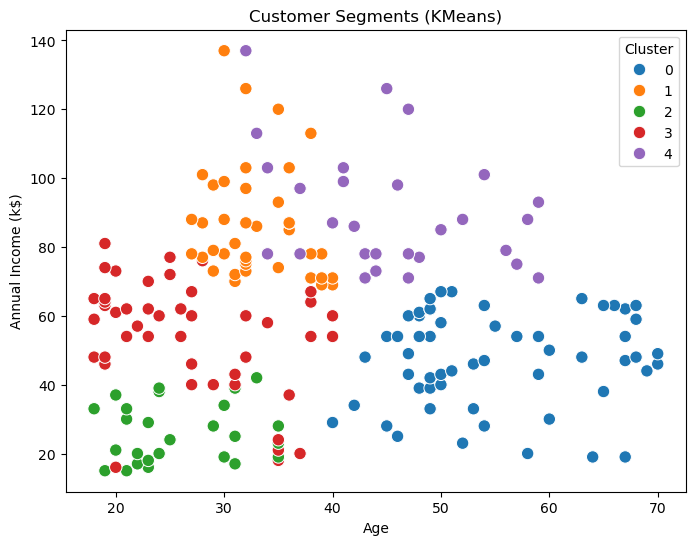

In [20]:
#  Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=df[features[0]], y=df[features[1]], hue=df['Cluster'], palette='tab10', s=80)
plt.title('Customer Segments (KMeans)')
plt.show()

In [46]:
# Cluster Analysis
print(df.groupby('Cluster')[features].mean())

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


In [47]:
# Simulated Customer Prediction
# Example: predict for Age=30, Income=60k$, Spending=80
test_customer = pd.DataFrame({
    "Age": [30],
    "Annual Income (k$)": [60],
    "Spending Score (1-100)": [80]
})

scaled_customer = scaler.transform(test_customer)
pred_cluster = kmeans.predict(scaled_customer)[0]

print("\n===== Prediction Results =====")
print(f"Predicted Cluster: {pred_cluster}")


===== Prediction Results =====
Predicted Cluster: 1


In [48]:

# Cluster characteristics
cluster_data = df[df["Cluster"] == pred_cluster]
print("\nCluster Characteristics:")
print("Average Age:", round(cluster_data["Age"].mean(), 2))
print("Average Income:", round(cluster_data["Annual Income (k$)"].mean(), 2))
print("Average Spending:", round(cluster_data["Spending Score (1-100)"].mean(), 2))
print("Cluster Size:", len(cluster_data))


Cluster Characteristics:
Average Age: 32.88
Average Income: 86.1
Average Spending: 81.53
Cluster Size: 40


In [49]:
# Segment Insights (basic rules)
print("\nSegment Insights:")
if cluster_data["Annual Income (k$)"].mean() > 70 and cluster_data["Spending Score (1-100)"].mean() > 60:
    print("Premium Customers — High income, High spending. Best for luxury products.")
elif cluster_data["Annual Income (k$)"].mean() < 40:
    print("Budget Customers — Low income, value-focused buyers.")
else:
    print("Mid-tier Customers — Balanced spenders, suitable for general offers.")


Segment Insights:
Premium Customers — High income, High spending. Best for luxury products.
